The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [12]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
#load the dataset 
nobel = pd.read_csv('data/nobel.csv')
print(nobel.head(10))

   year    category  ...      death_city   death_country
0  1901   Chemistry  ...          Berlin         Germany
1  1901  Literature  ...        Châtenay          France
2  1901    Medicine  ...         Marburg         Germany
3  1901       Peace  ...          Heiden     Switzerland
4  1901       Peace  ...           Paris          France
5  1901     Physics  ...          Munich         Germany
6  1902   Chemistry  ...          Berlin         Germany
7  1902  Literature  ...  Charlottenburg         Germany
8  1902    Medicine  ...    Putney Heath  United Kingdom
9  1902       Peace  ...            Bern     Switzerland

[10 rows x 18 columns]


Analyze Nobel Prize winner data and identify patterns by answering the following questions:

What is the most commonly awarded gender and birth country? Storing the string answers as top_gender and top_country.

In [13]:
print(nobel.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


In [14]:
# Count the occurrences of each gender and birth country
gender_counts = nobel['sex'].value_counts()
country_counts = nobel['birth_country'].value_counts()

# Get the most common gender and birth country
top_gender = gender_counts.idxmax()
top_country = country_counts.idxmax()
print(top_gender)
print(top_country)

Male
United States of America


What decade had the highest proportion of US-born winners? Store this as an integer called max_decade_usa.

In [15]:
# Calculate the proportion of USA born winners per decade

nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]
print(max_decade_usa)

2000


What decade and category pair had the highest proportion of female laureates? Store this as a dictionary called max_female_dict where the decade is the key and the category is the value.

Decade and category pair with the highest proportion of female laureates: {'decade': 2010, 'category': 'Peace'}
Decade and category with the highest mean of female winners: {'decade': 2010, 'category': 'Peace'}


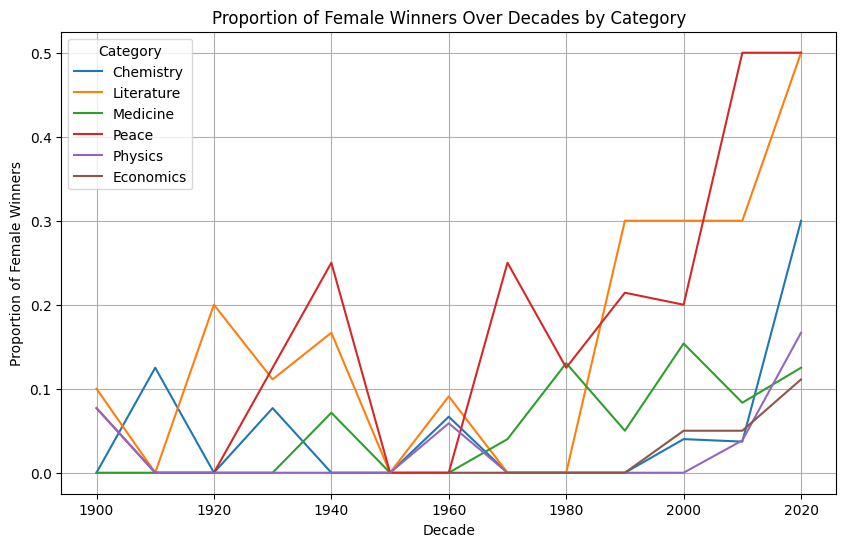

In [16]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], errors='coerce')

# Add 'female_winner' column
nobel['female_winner'] = nobel['sex'] == 'Female'

# Filter out rows with missing or null values in 'sex', 'decade', or 'category'
filtered_data = nobel.dropna(subset=['sex', 'decade', 'category'])

# Group by decade and category, calculate the mean of 'female_winner'
female_winner_mean = filtered_data.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Find the decade and category with the maximum mean value of 'female_winner'
max_female_winner = female_winner_mean.loc[female_winner_mean['female_winner'].idxmax()]
# Find the decade and category pair with the highest proportion of female laureates
max_female_winner = female_winner_mean.loc[female_winner_mean['female_winner'].idxmax()]

# Extract decade and category values
max_decade = max_female_winner['decade']
max_category = max_female_winner['category']

# Store the result in max_female_dict
max_female_dict = {'decade': max_decade, 'category': max_category}

print("Decade and category pair with the highest proportion of female laureates:", max_female_dict)

print("Decade and category with the highest mean of female winners:", max_decade_category)

# Create a relational line plot with multiple categories
plt.figure(figsize=(10, 6))
sns.lineplot(data=female_winner_mean, x='decade', y='female_winner', hue='category')
plt.title('Proportion of Female Winners Over Decades by Category')
plt.xlabel('Decade')
plt.ylabel('Proportion of Female Winners')
plt.legend(title='Category')
plt.grid(True)
plt.show()


Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as first_woman_name and first_woman_category.

In [17]:
# Filter the DataFrame for female winners
female_winners = nobel[nobel['sex'] == 'Female']

# Check if there are any female winners
if not female_winners.empty:
    # Find the earliest year and corresponding category
    earliest_female_winner = female_winners.loc[female_winners['year'].idxmin()]
    earliest_year = earliest_female_winner['year']
    first_woman_category = earliest_female_winner['category']
    first_woman_name = earliest_female_winner['full_name']
    
    print("The first woman to win a Nobel Prize:")
    print("Year:", earliest_year)
    print("Category:", first_woman_category)
    print(first_woman_name)
else:
    print("No female winners found in the dataset.")


The first woman to win a Nobel Prize:
Year: 1903
Category: Physics
Marie Curie, née Sklodowska


Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names in a list named repeat_list.

In [18]:
# Count occurrences of each laureate
laureate_counts = nobel['full_name'].value_counts()

# Filter for laureates who won more than one Nobel Prize
repeat_laureates = laureate_counts[laureate_counts > 1]

# Get the list of repeat laureates
repeat_list = repeat_laureates.index.tolist()

print("Individuals or organizations who have won multiple Nobel Prizes:", repeat_list)

Individuals or organizations who have won multiple Nobel Prizes: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
